<a href=https://www.buzzfeednews.com/article/peteraldhous/american-health-care>Buzzfeed article</a>
<br>
<a href=https://github.com/BuzzFeedNews/2017-05-us-health-care>Buzzfeed repo</a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# census dataset - counties and states ma

In [7]:
health_social = pd.read_csv('https://github.com/BuzzFeedNews/2017-05-us-health-care/blob/master/data/Bradley/health_social.csv?raw=true')
health_social.head()

,Country,Health,Social
0,France,12.66,32.4
1,Sweden,13.03,30.2
2,Denmark,11.57,30.4
3,Austria,11.17,30.0
4,Germany,12.03,29.0


In [8]:
prices = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2017-05-us-health-care/master/data/IFHP/prices.csv')
prices.head()

,country,intervention,type,value,key
0,US,MRI scan,Diagnosis,1119,US
1,UK,MRI scan,Diagnossis,788,Other
2,Switzerland,MRI scan,Diagnosis,503,Other
3,Spain,MRI scan,Diagnosis,85,Other
4,US,Cardiac catheterization,Diagnosis,5061,US


In [20]:
# ihme = pd.read_csv('https://github.com/BuzzFeedNews/2017-05-us-health-care/blob/master/data/IHME/ihme.XLSX?raw=true')
# ihme.head()

In [9]:
health_spending_per_cap = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2017-05-us-health-care/master/data/OECD/health_spending_per_cap.csv')
health_spending_per_cap.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HEALTHEXP,TOT,USD_CAP,A,1971,223.5920,NaN
1,AUS,HEALTHEXP,TOT,USD_CAP,A,1972,239.1784,NaN
2,AUS,HEALTHEXP,TOT,USD_CAP,A,1973,264.0303,NaN
3,AUS,HEALTHEXP,TOT,USD_CAP,A,1974,322.3286,NaN
4,AUS,HEALTHEXP,TOT,USD_CAP,A,1975,401.8512,NaN


In [14]:
life_expect_birth = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2017-05-us-health-care/master/data/OECD/life_expect_birth.csv')
life_expect_birth.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,LIFEEXP,TOT,YR,A,1960,70.9,NaN
1,AUS,LIFEEXP,TOT,YR,A,1961,71.2,NaN
2,AUS,LIFEEXP,TOT,YR,A,1962,71.0,NaN
3,AUS,LIFEEXP,TOT,YR,A,1963,71.1,NaN
4,AUS,LIFEEXP,TOT,YR,A,1964,70.7,NaN


In [37]:
nations = pd.read_csv('https://raw.githubusercontent.com/BuzzFeedNews/2017-05-us-health-care/master/data/OECD/nations.csv')
nations.head(100)

,country,isoc3
0,Australia,AUS
1,Austria,AUT
2,Belgium,BEL
3,Canada,CAN
4,Denmark,DNK
5,Finland,FIN
6,France,FRA
7,Germany,DEU
8,Greece,GRC
9,Iceland,ISL


Reproduce first plot:

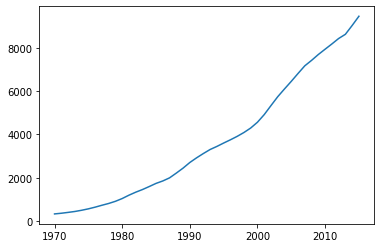

In [50]:
# plot healthcare spending per person over life expectancy
# health_spending_per_cap vs. life_expect_birth
health_spending_per_cap_bycountry = health_spending_per_cap.groupby("LOCATION")
health_spending_per_cap_US = health_spending_per_cap_bycountry.get_group("USA")
healthcare_cost = health_spending_per_cap_US["Value"]
healthcare_time = health_spending_per_cap_US["TIME"]

life_expect_bycountry = life_expect_birth.groupby("LOCATION")
life_expect_US = life_expect_bycountry.get_group("USA")
life_expect_time = life_expect_bycountry.get_group("USA")

# life_expect = life_expect_birth["Value"]
plt.plot(healthcare_time, healthcare_cost)
# plt.plot(life_expect_time, life_expect_US)
# type(healthcare_cost)
# # healthcare_cost.plot.box()